In [140]:
#import datasets
from sklearn import datasets # Load nad create datasets
#import preprocessing package
from sklearn import preprocessing, pipeline 
from sklearn import decomposition #for PCA
#import library for numerical computing
import numpy as np
import scipy
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# my own print function
def printme(objectme):
    print ('\n---------------------------\n')
    print(objectme)

# convert number to characters will show brighter color on picture
use_colors = {0:'yellow', 1:"red", 2:'green'}  #[use_colors[x] for x in blobs_set[1]]

In [18]:
#See what small datasets skleran contains
datasets.load_*?

#See what kind of dataset can we make
datasets.make_*?

In [9]:
#store boston dataset into boston variable
boston = datasets.load_boston()

#see description of boston dataset
#other attributes:'data', 'target', 'feature_names' 
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [124]:
#regression data
reg_data = datasets.make_regression(1000, 10, 5, 2, 1.0)
#classification data
classification_set = datasets.make_classification(weights=[0.1])
#cluster data
blobs_set = datasets.make_blobs()

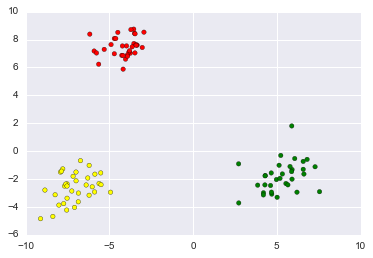

In [151]:
plt.scatter(blobs_set[0][:,0], blobs_set[0][:,1], c=[use_colors[x] for x in blobs_set[1]])

# Pipeline

In [76]:
np.random.seed(0)
mat = datasets.make_spd_matrix(10)
masking_array = np.random.binomial(1,0.1,mat.shape).astype(bool)
mat[masking_array] = np.nan
mat[:4, :4]

array([[ 0.75027514,  0.01009931, -0.02614111, -0.25772253],
       [ 0.01009931,  0.61417844,         nan,  0.25259811],
       [-0.02614111,  0.02790361,  0.5883984 ,  0.01600364],
       [-0.25772253,  0.25259811,  0.01600364,  1.96936493]])

In [77]:
impute = preprocessing.Imputer()
scaler = preprocessing.StandardScaler()
pipe = pipeline.Pipeline([('impute', impute), ('scaler', scaler)])
pipe

Pipeline(steps=[('impute', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [78]:
mat_piped = pipe.fit_transform(mat)

In [79]:
# values that been imputed should be zero.  see position [1,2]
mat_piped[:4,:4]

array([[  2.61894965e+00,  -5.75829300e-01,  -4.19219249e-01,
         -9.02907923e-01],
       [ -2.20079817e-02,   1.75576649e+00,   3.45239735e-17,
         -4.21081019e-01],
       [ -1.51314302e-01,  -5.07109113e-01,   2.63837838e+00,
         -6.44465249e-01],
       [ -9.77600015e-01,   3.60156014e-01,  -2.09531055e-01,
          1.19983018e+00]])

# Preprocessing ------ <font color='red'>Scale</color> 

In [28]:
x = np.random.randint(low=-1, high=10, size=20).reshape(5,4)

In [30]:
x

array([[ 9,  6,  0,  1],
       [ 4, -1,  7,  1],
       [ 1,  7,  6, -1],
       [ 8,  9,  4,  3],
       [ 3,  1,  9,  7]])

In [37]:
x_pre = x[:,:3]
x_pre

array([[ 9,  6,  0],
       [ 4, -1,  7],
       [ 1,  7,  6],
       [ 8,  9,  4],
       [ 3,  1,  9]])

### Before preprocessing

In [38]:
#get mean of the first 3 features
x_pre.mean(axis=0)

array([ 5. ,  4.4,  5.2])

In [39]:
#get std of the first 3 features
x_pre.std(axis=0)

array([ 3.03315018,  3.77359245,  3.05941171])

#### 1. After normal function scale preprocessing

In [40]:
x_2 = preprocessing.scale(x_pre)
x_2

C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.31876095,  0.42399915, -1.69967317],
       [-0.32969024, -1.43099714,  0.58834841],
       [-1.31876095,  0.68899862,  0.26148818],
       [ 0.98907071,  1.21899756, -0.39223227],
       [-0.65938047, -0.9009982 ,  1.24206886]])

In [42]:
#get mean of the first 3 features
x_2.mean(axis=0)

array([ -2.22044605e-17,  -1.33226763e-16,  -4.44089210e-17])

In [44]:
#get std of the first 3 features
x_2.std(axis=0)

array([ 1.,  1.,  1.])

#### 1. After scaler Class preprocessing --------> pipeline using

In [49]:
#normal preprocessor
normal_scaler = preprocessing.StandardScaler()
normal_scaler.fit_transform(x_pre)

C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.31876095,  0.42399915, -1.69967317],
       [-0.32969024, -1.43099714,  0.58834841],
       [-1.31876095,  0.68899862,  0.26148818],
       [ 0.98907071,  1.21899756, -0.39223227],
       [-0.65938047, -0.9009982 ,  1.24206886]])

In [51]:
#min-max preprocessor
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler.fit_transform(x_pre)

C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.        ,  0.7       ,  0.        ],
       [ 0.375     ,  0.        ,  0.77777778],
       [ 0.        ,  0.8       ,  0.66666667],
       [ 0.875     ,  1.        ,  0.44444444],
       [ 0.25      ,  0.2       ,  1.        ]])

In [61]:
#max-abs preprocessor
max_scaler = preprocessing.MaxAbsScaler()
max_scaler.fit_transform(x_pre)

array([[ 1.        ,  0.6       ,  0.        ],
       [ 0.44444444, -0.1       ,  0.77777778],
       [ 0.11111111,  0.7       ,  0.66666667],
       [ 0.88888889,  0.9       ,  0.44444444],
       [ 0.33333333, -1.        ,  1.        ]])

In [68]:
#euclidean distance
preprocessing.normalize(x_pre)

C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.83205029,  0.5547002 ,  0.        ],
       [ 0.49236596, -0.12309149,  0.86164044],
       [ 0.10783277,  0.75482941,  0.64699664],
       [ 0.63048832,  0.70929937,  0.31524416],
       [ 0.21764288, -0.72547625,  0.65292863]])

# Preprocessing ------ <font color='red'>Imputation</color>

In [58]:
iris = datasets.load_iris()
iris_data = iris.data
np.random.seed(0)

#### Start genderating missing values

In [59]:
masking_array = np.random.binomial(1, 0.25, iris_data.shape).astype(bool)

In [60]:
masking_array[:5]

array([[False, False, False, False],
       [False, False, False,  True],
       [ True, False,  True, False],
       [False,  True, False, False],
       [False,  True,  True,  True]], dtype=bool)

In [61]:
iris_data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [62]:
iris_data[masking_array] = np.nan

In [63]:
iris_data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  nan],
       [ nan,  3.2,  nan,  0.2],
       [ 4.6,  nan,  1.5,  0.2],
       [ 5. ,  nan,  nan,  nan]])

#### start imputing

In [64]:
# using mean value to impute
imputer = preprocessing.Imputer()
iris_data_imputed = imputer.fit_transform(iris_data)
iris_data_imputed[:5]

array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.        ,  1.4       ,  1.13679245],
       [ 5.85641026,  3.2       ,  3.75      ,  0.2       ],
       [ 4.6       ,  3.07155172,  1.5       ,  0.2       ],
       [ 5.        ,  3.07155172,  3.75      ,  1.13679245]])

In [65]:
np.nanmean(iris_data, axis=0)

array([ 5.85641026,  3.07155172,  3.75      ,  1.13679245])

In [66]:
# using median value to impute
imputer = preprocessing.Imputer(strategy='median')
iris_data_imputed = imputer.fit_transform(iris_data)
iris_data_imputed[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  1.3],
       [ 5.8,  3.2,  4.4,  0.2],
       [ 4.6,  3. ,  1.5,  0.2],
       [ 5. ,  3. ,  4.4,  1.3]])

In [67]:
np.nanmedian(iris_data, axis=0)

array([ 5.8,  3. ,  4.4,  1.3])

In [68]:
# using specified missing values
iris_data_copy = iris_data.copy()
iris_data_copy[masking_array] = -1
print(iris_data_copy[:5])
imputer = preprocessing.Imputer(missing_values=-1)
iris_data_imputed = imputer.fit_transform(iris_data_copy)
iris_data_imputed[:5]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4 -1. ]
 [-1.   3.2 -1.   0.2]
 [ 4.6 -1.   1.5  0.2]
 [ 5.  -1.  -1.  -1. ]]


array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.        ,  1.4       ,  1.13679245],
       [ 5.85641026,  3.2       ,  3.75      ,  0.2       ],
       [ 4.6       ,  3.07155172,  1.5       ,  0.2       ],
       [ 5.        ,  3.07155172,  3.75      ,  1.13679245]])

# Preprocessing ------ <font color='red'>Convert continous to binary</color>

In [73]:
boston = datasets.load_boston()

In [89]:
preprocessing.binarize(boston.target.reshape(1,-1), threshold=boston.target.mean())[0][:5]

array([ 1.,  0.,  1.,  1.,  1.])

In [92]:
(boston.target > boston.target.mean()).astype(int)[:5]

array([1, 0, 1, 1, 1])

# Preprocessing ------ <font color='red'>Create dummy variables</color>

In [172]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [129]:
d_pd = pd.DataFrame(d, columns=iris.feature_names)

In [134]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [130]:
d_pd.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [127]:
#vertical stack target and feactures
d = np.column_stack((x,y))

#### 1. OneHotEncode Class

In [161]:
text_encoder = preprocessing.OneHotEncoder()
print (text_encoder.fit_transform(d[:,-1:]).toarray()[:5])
print ('\n-------------------------------\n')
print (text_encoder.fit_transform(d[:,-1:]).toarray()[-5:])

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]

-------------------------------

[[ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


#### 2. LabelBinarizer Class

In [174]:
label_binarizer = preprocessing.LabelBinarizer(neg_label=-99, pos_label=99)
res = label_binarizer.fit_transform(y)
print (res[:5])
print ('\n-------------------------------\n')
print (res[-5:])

[[ 99 -99 -99]
 [ 99 -99 -99]
 [ 99 -99 -99]
 [ 99 -99 -99]
 [ 99 -99 -99]]

-------------------------------

[[-99 -99  99]
 [-99 -99  99]
 [-99 -99  99]
 [-99 -99  99]
 [-99 -99  99]]


# Preprocessing ------ <font color='red'> Reducing Dimension </color>

In [82]:
# load datast
iris = datasets.load_iris()
iris_data = iris.data

## Method 1: PCA

PCA(copy=True, n_components=2, whiten=False)

---------------------------

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]

---------------------------

[[-2.68420713 -0.32660731]
 [-2.71539062  0.16955685]
 [-2.88981954  0.13734561]
 [-2.7464372   0.31112432]
 [-2.72859298 -0.33392456]]

---------------------------

[ 0.92461621  0.05301557]


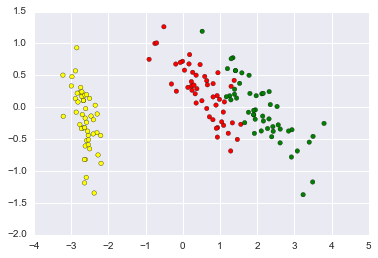

In [149]:
#choose 2 variables
pca = decomposition.PCA(n_components=2)
print(pca)
iris_pca = pca.fit_transform(iris_data)
# before pca
printme(iris_data[:5])
# after pca
printme(iris_pca[:5])
printme(pca.explained_variance_ratio_)
    
plt.scatter(x=iris_pca[:,0],y=iris_pca[:,1], c=[use_colors[x] for x in iris.target])

In [163]:
pca3d = decomposition.PCA(n_components=0.98)
iris_pca3d = pca3d.fit_transform(iris_data)
printme(iris_pca3d[:4])
printme(pca3d.explained_variance_ratio_)
printme(pca3d.explained_variance_ratio_.sum())

import mpl_toolkits.mplot3d.axes3d as ax3d



---------------------------

[[-2.68420713 -0.32660731  0.02151184]
 [-2.71539062  0.16955685  0.20352143]
 [-2.88981954  0.13734561 -0.02470924]
 [-2.7464372   0.31112432 -0.03767198]]

---------------------------

[ 0.92461621  0.05301557  0.01718514]

---------------------------

0.99481691455


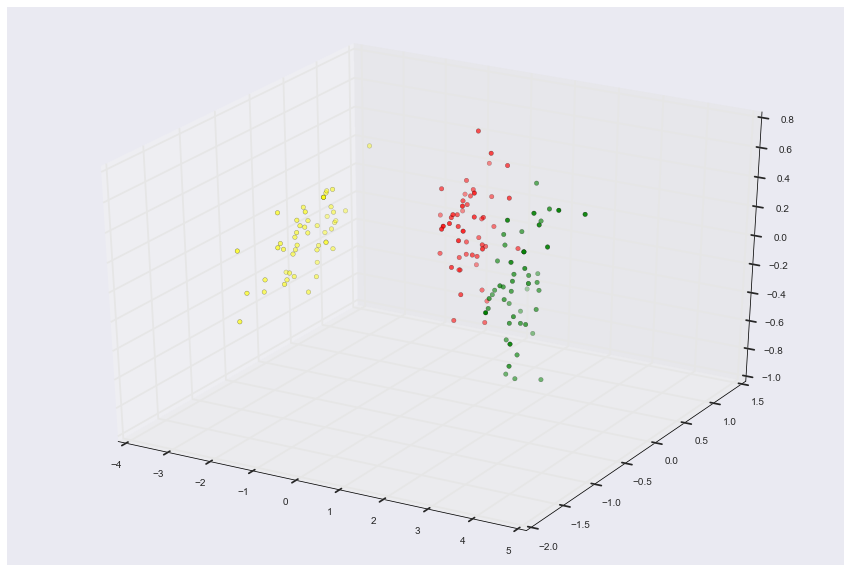

In [183]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
# fig, ax = plt.subplots(111, figsize=(15,10), projection='3d')
ax.scatter(xs=iris_pca3d[:,0], ys=iris_pca3d[:,1], zs=iris_pca3d[:,2], c=[use_colors[x] for x in iris.target])

## Part2: Factor Analysis

In [188]:
#use to components
fa = decomposition.FactorAnalysis(n_components=2)
iris_fa_two_dim = fa.fit_transform(iris.data)
printme(iris.data[:4])
printme(iris_fa_two_dim[:4])


---------------------------

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]]

---------------------------

[[-1.33125848 -0.55846779]
 [-1.33914102  0.00509715]
 [-1.40258715  0.307983  ]
 [-1.29839497  0.71854288]]


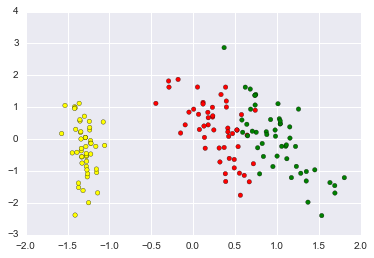

In [187]:
plt.scatter(x=iris_fa_two_dim[:,0], y=iris_fa_two_dim[:,1], c=[use_colors[x] for x in iris.target])